<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-Setup" data-toc-modified-id="Python-Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python Setup</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Patents-with-index-below-0" data-toc-modified-id="Patents-with-index-below-0-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Patents with index below 0</a></span></li><li><span><a href="#Patents-with-index-above-0" data-toc-modified-id="Patents-with-index-above-0-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Patents with index above 0</a></span></li><li><span><a href="#Find-which-verbs-and-nouns-are-unique-to-above_0-and-below_0-patents" data-toc-modified-id="Find-which-verbs-and-nouns-are-unique-to-above_0-and-below_0-patents-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Find which verbs and nouns are unique to above_0 and below_0 patents</a></span></li><li><span><a href="#Patents-with-index-1" data-toc-modified-id="Patents-with-index-1-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Patents with index 1</a></span></li><li><span><a href="#Patents-with-closer-to--1-index" data-toc-modified-id="Patents-with-closer-to--1-index-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Patents with closer to -1 index</a></span></li></ul></div>

### Python Setup

In [1]:
# Data manipulation

import pandas as pd
from collections import Counter

# POS tagging, text analysis

from textblob import TextBlob
import nltk
import spacy
nlp = spacy.load('en_core_web_lg')  # this is the large model to train on: https://spacy.io/models/en

# Visualization

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

### Load data

In [2]:
text = pd.read_csv('patents_text_cdindex_i_2017y_gt_1000_20190901.csv', error_bad_lines=False)

b'Skipping line 8: expected 15 fields, saw 18\nSkipping line 38: expected 15 fields, saw 19\nSkipping line 65: expected 15 fields, saw 23\nSkipping line 99: expected 15 fields, saw 21\nSkipping line 101: expected 15 fields, saw 21\nSkipping line 121: expected 15 fields, saw 25\nSkipping line 122: expected 15 fields, saw 25\nSkipping line 131: expected 15 fields, saw 21\nSkipping line 138: expected 15 fields, saw 25\nSkipping line 144: expected 15 fields, saw 20\nSkipping line 148: expected 15 fields, saw 26\nSkipping line 151: expected 15 fields, saw 43\nSkipping line 153: expected 15 fields, saw 31\nSkipping line 156: expected 15 fields, saw 27\nSkipping line 160: expected 15 fields, saw 25\nSkipping line 161: expected 15 fields, saw 25\nSkipping line 172: expected 15 fields, saw 16\nSkipping line 177: expected 15 fields, saw 21\n'


In [3]:
text = text[['patent_number','title','abstract','cd_2017y','mcd_2017y']]

In [44]:
text.head()

,patent_number,title,abstract,cd_2017y,mcd_2017y
0,3953566,Process for producing porous products,This invention provides a tetrafluoroethylene...,1.000000,1046.000
1,4100324,Nonwoven fabric and method of producing same,A nonwoven fabric-like material having a uniq...,1.000000,1047.000
2,4179337,Non-immunogenic polypeptides,Polypeptides such as enzymes and insulin are ...,0.644334,854.386
3,4313124,Liquid jet recording process and liquid jet re...,A liquid jet recording process and liquid jet...,0.872193,1358.010
4,4340563,Method for forming nonwoven webs,An improved method and apparatus for forming ...,0.829288,1002.610


### Patents with index below 0 

In [4]:
text_below_0 = text[text['cd_2017y'] < 0]

In [5]:
# Use POS tagging in spacy

results_below_0 = []
for index,i in enumerate(text_below_0['title']):
    doc = nlp(i)
    for token in doc:
        results_below_0.append([index,token.lemma_, token.pos_])

In [45]:
# Use POS tagging in spacy

results_below_0_abstracts = []
for index,i in enumerate(text_below_0['abstract']):
    doc = nlp(i)
    for token in doc:
        results_below_0_abstracts.append([index,token.lemma_, token.pos_])

In [47]:
results_below_0_abstracts = pd.DataFrame(results_below_0_abstracts)
results_below_0_abstracts.head()

,0,1,2
0,0,,SPACE
1,0,various,ADJ
2,0,fastener,NOUN
3,0,be,VERB
4,0,provide,VERB


In [48]:
# Get all verbs 

results_below_0_verbs_abstracts = results_below_0_abstracts[results_below_0_abstracts[2] == 'VERB']

# Count the number of unique verbs

count_below_0_verbs_abstracts = Counter(results_below_0_verbs_abstracts[1])

# A list of unique verbs

set_below_0_verbs_abstracts = list(set(results_below_0_verbs_abstracts[1]))

In [6]:
results_below_0 = pd.DataFrame(results_below_0)

In [7]:
results_below_0.head()

,0,1,2
0,0,mesh,PROPN
1,0,tissue,NOUN
2,0,fastener,NOUN
3,1,disposable,ADJ
4,1,linear,ADJ


In [66]:
# Get all adjectives 

results_below_0_adjectives_abstracts = results_below_0_abstracts[results_below_0_abstracts[2] == 'ADJ']

# Count of unique adjectives

count_below_0_adjectives_abstracts = Counter(results_below_0_adjectives_abstracts[1])

# A list of unique adjectives

set_below_0_adjectives_abstracts = list(set(results_below_0_adjectives_abstracts[1]))

In [35]:
# Get all adjectives 

results_below_0_adjectives = results_below_0[results_below_0[2] == 'ADJ']

# Count of unique adjectives

count_below_0_adjectives = Counter(results_below_0_adjectives[1])

# A list of unique adjectives

set_below_0_adjectives = list(set(results_below_0_adjectives[1]))

In [8]:
# Get all verbs 

results_below_0_verbs = results_below_0[results_below_0[2] == 'VERB']

# Count the number of unique verbs

count_below_0_verbs = Counter(results_below_0_verbs[1])

# A list of unique verbs

set_below_0_verbs = list(set(results_below_0_verbs[1]))

In [58]:
# Get all nouns

results_below_0_nouns_abstracts = results_below_0_abstracts[results_below_0_abstracts[2] == 'NOUN']

# Count of unique nouns

count_below_0_nouns_abstracts = Counter(results_below_0_nouns_abstracts[1])

# A list of unique nouns

set_below_0_nouns_abstracts = list(set(results_below_0_nouns_abstracts[1]))

In [11]:
# Get all nouns

results_below_0_nouns = results_below_0[results_below_0[2] == 'NOUN']

# Count of unique nouns

count_below_0_nouns = Counter(results_below_0_nouns[1])

# A list of unique nouns

set_below_0_nouns = list(set(results_below_0_nouns[1]))

In [59]:
count_below_0_nouns_abstracts.most_common()

[('system', 132),
 ('sensor', 124),
 ('electrode', 61),
 ('device', 60),
 ('datum', 51),
 ('unit', 46),
 ('user', 43),
 ('glucose', 42),
 ('analyte', 42),
 ('computer', 40),
 ('film', 39),
 ('method', 37),
 ('information', 35),
 ('game', 34),
 ('player', 34),
 ('layer', 33),
 ('gaming', 33),
 ('contact', 32),
 ('semiconductor', 32),
 ('channel', 30),
 ('signal', 30),
 ('blood', 29),
 ('concentration', 29),
 ('control', 29),
 ('position', 28),
 ('bonus', 28),
 ('member', 27),
 ('display', 26),
 ('surface', 25),
 ('stent', 25),
 ('substrate', 25),
 ('body', 24),
 ('transaction', 24),
 ('patient', 24),
 ('immunoglobulin', 24),
 ('oxide', 24),
 ('tissue', 23),
 ('catheter', 23),
 ('invention', 23),
 ('instrument', 23),
 ('element', 22),
 ('fluid', 22),
 ('vessel', 22),
 ('material', 22),
 ('level', 21),
 ('matching', 21),
 ('apparatus', 21),
 ('corn', 21),
 ('portion', 20),
 ('network', 20),
 ('monitor', 20),
 ('prize', 20),
 ('embodiment', 19),
 ('plurality', 19),
 ('acid', 19),
 ('base',

### Patents with index above 0

In [50]:
text_above_0 = text[text['cd_2017y'] > 0]

In [21]:
# Use POS tagging in spacy

results_above_0 = []
for index,i in enumerate(text_above_0['title']):
    doc = nlp(i)
    for token in doc:
        results_above_0.append([index,token.lemma_, token.pos_])

In [51]:
# Use POS tagging in spacy

results_above_0_abstracts = []
for index,i in enumerate(text_above_0['abstract']):
    doc = nlp(i)
    for token in doc:
        results_above_0_abstracts.append([index,token.lemma_, token.pos_])

In [52]:
results_above_0_abstracts = pd.DataFrame(results_above_0_abstracts)

results_above_0_abstracts.head()

,0,1,2
0,0,,SPACE
1,0,this,DET
2,0,invention,NOUN
3,0,provide,VERB
4,0,a,DET


In [53]:
# Get all verbs

results_above_0_verbs_abstracts = results_above_0_abstracts[results_above_0_abstracts[2] == 'VERB']

# Get unique verbs

set_above_0_verbs_abstracts = list(set(results_above_0_verbs_abstracts[1]))

# Count unique verbs

count_above_0_verbs_abstracts = Counter(results_above_0_verbs_abstracts[1])

In [22]:
results_above_0 = pd.DataFrame(results_above_0)

results_above_0.head()

In [65]:
# Get all adjectives 

results_above_0_adjectives_abstracts = results_above_0_abstracts[results_above_0_abstracts[2] == 'ADJ']

# Count of unique adjectives

count_above_0_adjectives_abstracts = Counter(results_above_0_adjectives_abstracts[1])

# A list of unique adjectives

set_above_0_adjectives_abstracts = list(set(results_above_0_adjectives_abstracts[1]))

In [39]:
# Get all adjectives 

results_above_0_adjectives = results_above_0[results_above_0[2] == 'ADJ']

# Count of unique adjectives

count_above_0_adjectives = Counter(results_above_0_adjectives[1])

# A list of unique adjectives

set_above_0_adjectives = list(set(results_above_0_adjectives[1]))

In [24]:
# Get all verbs

results_above_0_verbs = results_above_0[results_above_0[2] == 'VERB']

# Get unique verbs

set_above_0_verbs = list(set(results_above_0_verbs[1]))

# Count unique verbs

count_above_0_verbs = Counter(results_above_0_verbs[1])

In [60]:
# Get all nouns

results_above_0_nouns_abstracts = results_above_0_abstracts[results_above_0_abstracts[2] == 'NOUN']

# Get unique nouns

set_above_0_nouns_abstracts = list(set(results_above_0_nouns_abstracts[1]))

# Count unique nouns

count_above_0_nouns_abstracts = Counter(results_above_0_nouns_abstracts[1])

In [25]:
# Get all nouns

results_above_0_nouns = results_above_0[results_above_0[2] == 'NOUN']

# Get unique nouns

set_above_0_nouns = list(set(results_above_0_nouns[1]))

# Count unique nouns

count_above_0_nouns = Counter(results_above_0_nouns[1])

(-0.5, 399.5, 199.5, -0.5)

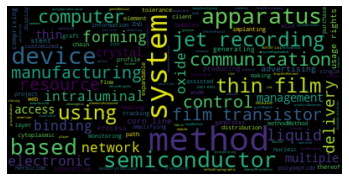

In [117]:
titles_above_0 = text_above_0['title'].values.tolist()
titles_above_0_string = ''.join(titles_above_0)
wordcloud = WordCloud(max_font_size=40).generate(titles_above_0_string)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

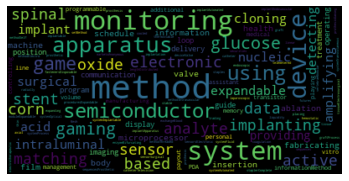

In [118]:
titles_below_0 = text_below_0['title'].values.tolist()
titles_below_0_string = ''.join(titles_below_0)
wordcloud = WordCloud(max_font_size=40).generate(titles_below_0_string)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

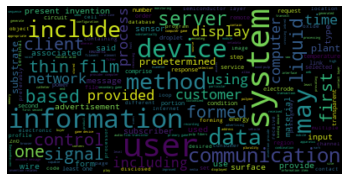

In [119]:
abstracts_above_0 = text_above_0['abstract'].values.tolist()
abstracts_above_0_string = ''.join(abstracts_above_0)
wordcloud = WordCloud(max_font_size=40).generate(abstracts_above_0_string)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

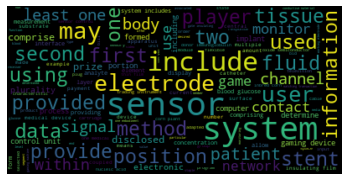

In [120]:
abstracts_below_0 = text_below_0['abstract'].values.tolist()
abstracts_below_0_string = ''.join(abstracts_below_0)
wordcloud = WordCloud(max_font_size=40).generate(abstracts_below_0_string)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [61]:
count_above_0_nouns_abstracts.most_common()

[('user', 99),
 ('system', 89),
 ('device', 79),
 ('information', 76),
 ('layer', 58),
 ('computer', 55),
 ('method', 54),
 ('game', 51),
 ('film', 47),
 ('communication', 46),
 ('invention', 42),
 ('server', 37),
 ('client', 36),
 ('message', 35),
 ('electrode', 33),
 ('plant', 32),
 ('contact', 31),
 ('semiconductor', 31),
 ('datum', 30),
 ('display', 29),
 ('advertisement', 27),
 ('network', 26),
 ('substrate', 26),
 ('item', 26),
 ('material', 25),
 ('signal', 25),
 ('line', 25),
 ('program', 25),
 ('wire', 24),
 ('customer', 24),
 ('region', 24),
 ('portion', 23),
 ('control', 23),
 ('liquid', 22),
 ('time', 22),
 ('sensor', 21),
 ('surface', 20),
 ('process', 20),
 ('provider', 20),
 ('type', 19),
 ('input', 19),
 ('corn', 19),
 ('document', 19),
 ('subscriber', 19),
 ('consumer', 18),
 ('image', 17),
 ('channel', 17),
 ('data', 17),
 ('cell', 17),
 ('temperature', 16),
 ('energy', 16),
 ('apparatus', 16),
 ('number', 16),
 ('interface', 16),
 ('circuit', 16),
 ('gate', 16),
 ('p

### Find which verbs and nouns are unique to above_0 and below_0 patents

In [67]:
difference_adjectives_in_above_0_abstracts = list(set(set_above_0_adjectives_abstracts) - set(set_below_0_adjectives_abstracts))

difference_adjectives_in_below_0_abstracts = list(set(set_below_0_adjectives_abstracts) - set(set_above_0_adjectives_abstracts))

In [41]:
difference_adjectives_in_above_0 = list(set(set_above_0_adjectives) - set(set_below_0_adjectives))

difference_adjectives_in_below_0 = list(set(set_below_0_adjectives) - set(set_above_0_adjectives))

In [62]:
difference_nouns_in_above_0_abstracts = list(set(set_above_0_nouns_abstracts) - set(set_below_0_nouns_abstracts))

difference_nouns_in_below_0_abstracts = list(set(set_below_0_nouns_abstracts) - set(set_above_0_nouns_abstracts))

In [31]:
difference_nouns_in_above_0 = list(set(set_above_0_nouns) - set(set_below_0_nouns))

difference_nouns_in_below_0 = list(set(set_below_0_nouns) - set(set_above_0_nouns))

In [55]:
difference_verbs_in_above_0_abstracts = list(set(set_above_0_verbs_abstracts) - set(set_below_0_verbs_abstracts))

difference_verbs_in_below_0_abstracts = list(set(set_below_0_verbs_abstracts) - set(set_above_0_verbs_abstracts))

In [57]:
difference_verbs_in_below_0_abstracts

['drag',
 'fall',
 'ensure',
 'unpackag',
 'therethrough',
 'ascend',
 'lie',
 'lift',
 'approximate',
 'deal',
 'incorporate',
 'wedge',
 'reset',
 'stop',
 'wear',
 'participate',
 'land',
 'grip',
 'b>41</b',
 'bend',
 'award',
 'calibrate',
 'pack',
 'rest',
 'possess',
 'vary',
 'arc',
 'remain',
 'count',
 'stabilize',
 'situate',
 'humanize',
 'scroll',
 'touch',
 'ascertain',
 'lh283btmon810',
 'prerecord',
 'multiply',
 'restrain',
 'limit',
 'correlate',
 'force',
 'push',
 'wish',
 'depend',
 'typify',
 'slide',
 'offer',
 'range',
 'exert',
 'vibrate',
 'preserve',
 'face',
 'resist',
 'groove',
 'design',
 'b>45</b',
 'block',
 'replace',
 'sandwich',
 'bifurcate',
 'braid',
 'zno.',
 'stack',
 'stimulate',
 'maximize',
 'tissue',
 'spiral',
 'conduct',
 'approach',
 'shift',
 'clinch',
 'catalyze',
 'decrypt',
 'mask',
 'map',
 'work',
 'affix',
 'ramp',
 'pierce',
 'trap',
 'seek',
 'complete',
 'manage',
 'unify',
 'urge',
 'house',
 'assure',
 'reconfigur',
 'accommoda

In [56]:
difference_verbs_in_above_0_abstracts

['decode',
 'fix',
 'undergo',
 'diffuse',
 'spread',
 'inputt',
 'suit',
 'merge',
 'trace',
 'mention',
 'stream',
 'b>16</b',
 'light',
 'plug',
 'become',
 'search',
 'assume',
 'reveal',
 'threaten',
 'prefer',
 'join',
 'pertain',
 'b>8</b',
 'induce',
 'amount',
 'perceive',
 'partition',
 'owe',
 'energize',
 'divide',
 'strain',
 'propagate',
 'sputter',
 'subscribe',
 'inject',
 'cache',
 'understand',
 'bond',
 'refer',
 'modulate',
 'remove',
 'compute',
 'grain',
 'prevent',
 'displace',
 'drain',
 'know',
 'diverge',
 'deposit',
 'interleave',
 'append',
 'navigate',
 'emerge',
 'reproduce',
 'report',
 'delay',
 'accelerate',
 'fly',
 'bypass',
 'emit',
 'persist',
 'return',
 'click',
 'render',
 'go',
 'instance',
 'fill',
 'target',
 'spin',
 'refold',
 'download',
 'categorize',
 'bring',
 'schedule',
 'follow',
 'alternate',
 'enclose',
 'exclude',
 'upload',
 'element',
 'organize',
 'heat',
 'file',
 'compile',
 'meet',
 'modify',
 'blow',
 'ask',
 'assemble',
 'c

In [93]:
difference_verbs_in_above_0 = list(set(set_above_0_verbs) - set(set_below_0_verbs))

difference_verbs_in_below_0 = list(set(set_below_0_verbs) - set(set_above_0_verbs))

(-0.5, 399.5, 199.5, -0.5)

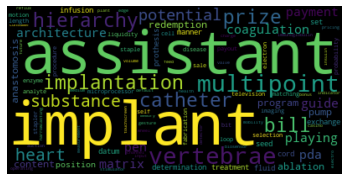

In [107]:
nouns_below_0 = ' '.join(difference_nouns_in_below_0)
wordcloud = WordCloud().generate(nouns_below_0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

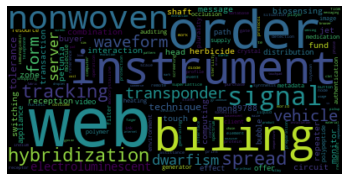

In [108]:
nouns_above_0 = ' '.join(difference_nouns_in_above_0)
wordcloud = WordCloud().generate(nouns_above_0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

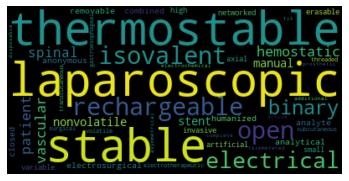

In [109]:
adjectives_below_0 = ' '.join(difference_adjectives_in_below_0)
wordcloud = WordCloud().generate(adjectives_below_0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

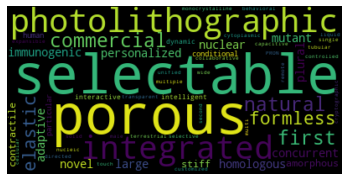

In [110]:
adjectives_above_0 = ' '.join(difference_adjectives_in_above_0)
wordcloud = WordCloud().generate(adjectives_above_0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

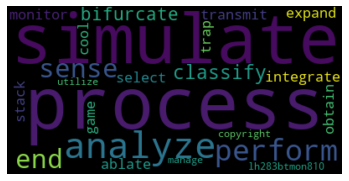

In [105]:
verbs_below_0 = ' '.join(difference_verbs_in_below_0)
wordcloud = WordCloud().generate(verbs_below_0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

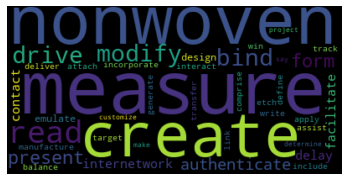

In [106]:
verbs_above_0 = ' '.join(difference_verbs_in_above_0)
wordcloud = WordCloud().generate(verbs_above_0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

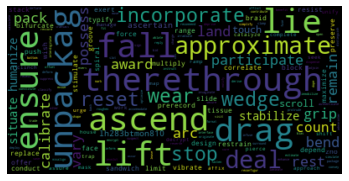

In [115]:
verbs_below_0_abstracts = ' '.join(difference_verbs_in_below_0_abstracts)
wordcloud = WordCloud(max_font_size=40).generate(verbs_below_0_abstracts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

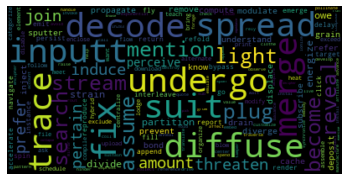

In [116]:
verbs_above_0_abstracts = ' '.join(difference_verbs_in_above_0_abstracts)
wordcloud = WordCloud(max_font_size=40).generate(verbs_above_0_abstracts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [94]:
# Unique verbs in below_0

difference_verbs_in_below_0

['process',
 'simulate',
 'analyze',
 'perform',
 'sense',
 'end',
 'classify',
 'bifurcate',
 'integrate',
 'transmit',
 'stack',
 'select',
 'obtain',
 'ablate',
 'expand',
 'cool',
 'monitor',
 'game',
 'trap',
 'copyright',
 'lh283btmon810',
 'manage',
 'utilize']

In [169]:
# Unique verbs in above_0

difference_verbs_in_above_0

['incorporate',
 'deliver',
 'project',
 'win',
 'generate',
 'authenticate',
 'etch',
 'transfer',
 'interact',
 'design',
 'internetwork',
 'assist',
 'track',
 'present',
 'make',
 'manufacture',
 'read',
 'create',
 'form',
 'customize',
 'emulate',
 'facilitate',
 'target',
 'delay',
 'determine',
 'write',
 'attach',
 'balance',
 'nonwoven',
 'apply',
 'say',
 'define',
 'contact',
 'measure',
 'drive',
 'comprise',
 'bind',
 'link',
 'modify',
 'include']

### Patents with index 1

In [180]:
text_1 = text[text['cd_2017y'] == 1]

In [68]:
# POS tagging with textblob

results_1_textblob = []
for index,i in enumerate(text_1['title']):
    blob = TextBlob(i)
    for words, tag in blob.tags:
        results_1_textblob.append([index,words,tag])

In [69]:
results_1_textblob

[[0, 'Process', 'NN'],
 [0, 'for', 'IN'],
 [0, 'producing', 'VBG'],
 [0, 'porous', 'JJ'],
 [0, 'products', 'NNS'],
 [1, 'Nonwoven', 'NNP'],
 [1, 'fabric', 'NN'],
 [1, 'and', 'CC'],
 [1, 'method', 'NN'],
 [1, 'of', 'IN'],
 [1, 'producing', 'VBG'],
 [1, 'same', 'JJ'],
 [2, 'Cryptographic', 'NNP'],
 [2, 'communications', 'NNS'],
 [2, 'system', 'NN'],
 [2, 'and', 'CC'],
 [2, 'method', 'NN'],
 [3, 'Process', 'NN'],
 [3, 'for', 'IN'],
 [3, 'amplifying', 'VBG'],
 [3, 'nucleic', 'JJ'],
 [3, 'acid', 'NN'],
 [3, 'sequences', 'NNS'],
 [4, 'Inbred', 'NNP'],
 [4, 'corn', 'NN'],
 [4, 'line', 'NN'],
 [4, 'PHT47', 'NNP'],
 [5, 'Mutant', 'JJ'],
 [5, 'dwarfism', 'NN'],
 [5, 'gene', 'NN'],
 [5, 'of', 'IN'],
 [5, 'petunia', 'NN'],
 [6, 'Inbred', 'NNP'],
 [6, 'maize', 'MD'],
 [6, 'line', 'NN'],
 [6, 'PH0HC', 'VB'],
 [7, 'Oxide', 'NNP'],
 [7, 'thin', 'JJ'],
 [7, 'film', 'NN'],
 [8, 'Field-effect', 'JJ'],
 [8, 'transistor', 'NN'],
 [8, 'and', 'CC'],
 [8, 'method', 'NN'],
 [8, 'for', 'IN'],
 [8, 'manufacturin

In [125]:
results_1 = []
for index,i in enumerate(text_1['title']):
    doc = nlp(i)
    for token in doc:
        results_1.append([index,token.lemma_, token.pos_,token.tag_])

In [126]:
results_1 = pd.DataFrame(results_1)

In [128]:
# Get all verbs 

results_1_verbs = results_1[results_1[2] == 'VERB']

In [129]:
# Count unique verbs

Counter(results_1_verbs[1])

Counter({'produce': 2, 'nonwoven': 1, 'amplify': 1, 'manufacture': 1})

In [130]:
# Get unique verbs

set(results_1_verbs[1])

{'amplify', 'manufacture', 'nonwoven', 'produce'}

In [206]:
results_1_nouns = results_1[results_1[2] == 'NOUN']

### Patents with closer to -1 index

In [34]:
text_minus_1 = text[text['cd_2017y'] < -0.8]

In [207]:
# POS tagging with spacy

results_minus_1 = []
for index,i in enumerate(text_minus_1['title']):
    doc = nlp(i)
    for token in doc:
        results_minus_1.append([index,token.lemma_, token.pos_])

In [132]:
results_minus_1 = pd.DataFrame(results_minus_1)

In [134]:
# Get all verbs

results_minus_1_verbs = results_minus_1[results_minus_1[2] == 'VERB']

In [136]:
# Count unique verbs

Counter(results_minus_1_verbs[1])

Counter({'use': 1, 'fabricate': 1})

In [137]:
# Get unique verbs

set(results_minus_1_verbs[1])

{'fabricate', 'use'}

In [208]:
# Get unique nouns

results_minus_1_nouns = results_minus_1[results_minus_1[2] == 'NOUN']